In [24]:
## import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
##  read the dataset:
df=pd.read_csv(r'C:\Users\user\Downloads\archive (8)\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
## make a copy and use if necessary:
df1=df.copy()

In [27]:
## check all the data types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
## to check the shape of the data:
df.shape

(1338, 7)

In [29]:
## Let us split our data into different age groups:
## 18-24(group a),25-35(group b),36-45(group c),46-60(group d),above 60 (group e)


In [30]:
## STEP 1:
df['AGE_GROUP']=df['age']

In [31]:
## STEP 2:

def func_conv(i):
    if i>=18 and i<=24:
        return 'GROUP_A'
    if i>=25 and i<=35:
        return 'GROUP_B'
    if i>=36 and i<=45:
        return 'GROUP_C'
    if i>=46 and i<=60:
        return 'GROUP_D'
    if i>=60:
        return 'GROUP_E'

In [32]:
df['AGE_GROUP']=df['AGE_GROUP'].apply(func_conv)

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges,AGE_GROUP
0,19,female,27.900,0,yes,southwest,16884.92400,GROUP_A
1,18,male,33.770,1,no,southeast,1725.55230,GROUP_A
2,28,male,33.000,3,no,southeast,4449.46200,GROUP_B
3,33,male,22.705,0,no,northwest,21984.47061,GROUP_B
4,32,male,28.880,0,no,northwest,3866.85520,GROUP_B


                              EXPLORATORY DATA ANALYSIS
                           PART A OF EDA: UNDERSTANDING DATA 

1. Beneficiery:The person who is entitled to receive the amount once the 
2. This dataset consists of the following columns:
    A.Age: This column represents the age of the beneficiery 
    B.sex: This column represents the gender of the beneficiery
    C.bmi:Body mass index is a persons weight in kg divided by the height square 
    D.Children: Number of children that get covered by this health insurance 
    E.Smoker: If the beneficiery smokes or not 
    F.Region: Beneficieries residential area in the US.
    G.Insurance: The coverage amount given to the policy holder for medical expenses during   health emergency.
3. My ASSUMPTION:
* Shruthi,works as a Data Scientist in ABC insurance company 
* Given is the dataset of the insurance charges that are to be paid by set of 1400 people based on conditions like age , sex and few health records of the person.
* Her Boss has asked her gives her past records of their company and assigns her 
  a task:
1. To build a model in order to predict the health insurance coverage amount of an individual.




                                  LET US BEGIN !!!

In [34]:
## UNIVARIATE ANALYSIS:

## Let us check average age of the people who have applied for insurance:

print('The mean age of the people who have appled for insurance',np.mean(df['age']))

The mean age of the people who have appled for insurance 39.20702541106129


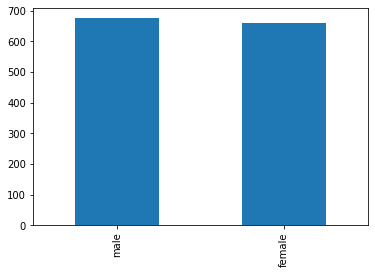

In [35]:
## The proportion of male and female who have applied for insurance ABC insurance company
## in different regions in US.

df['sex'].value_counts().plot(kind='bar')

## Based on gender there is very less difference on the people who 
## have come to the company to apply for insurance



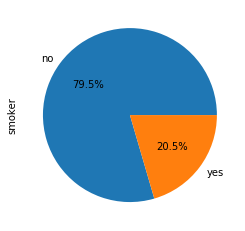

In [36]:
## Does the proportion of smokers and non smokers who claim for insurance differ?

df['smoker'].value_counts().plot(kind='pie',autopct='%.1f%%')

## It looks like the proportion of non smokers who have applied for insurance is more than smokers

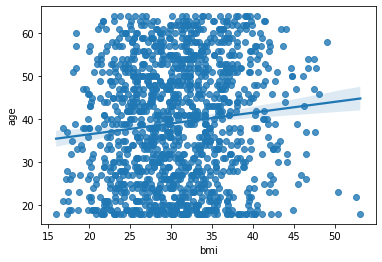

In [37]:
## BIVARIATE ANALYSIS:

## Does bmi and age have any relation with them ?

sns.regplot(df['bmi'],df['age'])
plt.show()

## The see to Have some amount of correlation 

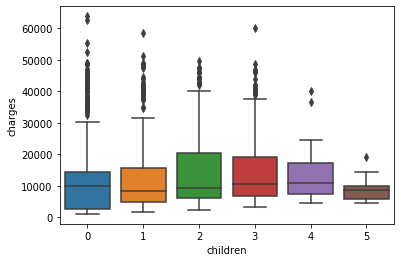

In [38]:
## Does number of children and mean insurance charges have any difference?

sns.boxplot(x="children", y="charges", data=df)
plt.show()

## We see that the avergae insurance charges does 
## have a difference.

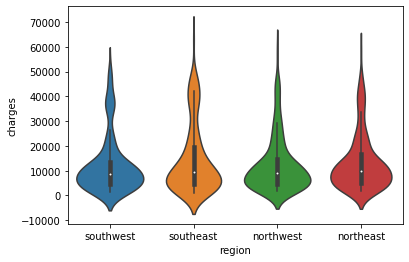

In [39]:
## Does the region who live have an effect on the insurance claim:

sns.violinplot(x='region',y='charges',data=df)
plt.show()

## We can see that average charges in south east is a bit on the higher side

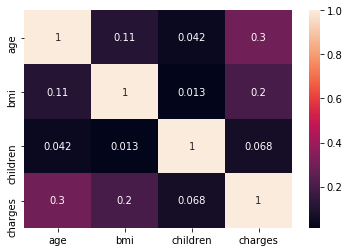

In [40]:
## MULTIVARIATE ANALYSIS:

corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)

## We see that bmi and age does have a moderate relationship and can contribute in predicting the insurnace charges 

                                   STATISTICAL ANALYSIS 

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges,AGE_GROUP
0,19,female,27.900,0,yes,southwest,16884.92400,GROUP_A
1,18,male,33.770,1,no,southeast,1725.55230,GROUP_A
2,28,male,33.000,3,no,southeast,4449.46200,GROUP_B
3,33,male,22.705,0,no,northwest,21984.47061,GROUP_B
4,32,male,28.880,0,no,northwest,3866.85520,GROUP_B


In [42]:
## DOES BEING A SMOKER OR NOT HAVE AN EFFECT ON THE HEALTH INSURANCE CHARGES:

## IN TERMS OF STATISTICS:

## Ho: mean(insurance charges for smokers)=mean(insurance charges for non smokers)
## Ha: mean (insurance charges for smokers)!= mean(insurnace charges for non smokers)

## We see that we have categorical column (smoker,with two categories) and numerical column insurance charges

## We go for 2 sample mean unpaired test :

## check for normality:

sample_1=df['charges'][df['smoker']=='yes']
sample_2=df['charges'][df['smoker']=='no']

from scipy.stats import shapiro 

print(shapiro(sample_1),shapiro(sample_2))

## We see that both the values are below 0.05 . Hence the data is not normal 

## So we go mannwhitneyu test 

from scipy.stats import mannwhitneyu 

mannwhitneyu(sample_1,sample_2)

## We see that the p value is less than 0.05 Hence we reject H0


## Yes there is a significant difference in the insurance amount paid by individual who
## are smokers and non smokers 





(0.9395521879196167, 3.6251879276250065e-09) (0.8728628158569336, 1.4455900162299346e-28)


MannwhitneyuResult(statistic=7403.0, pvalue=2.6351167222517853e-130)

In [43]:
## Is there an effect on age group and medical charges ?

## We see that we have one numerical and categorical column( with more than 2 categories)


## IN TERMS OF STATISTICS:

## H0: mean(insurance charges for Group A)=mean(insurance charges for Group B)=mean(insurance charges for GROUP C)=mean(insurance charges for GROUP D)
## Ha: mean(insurance charges for Group A)!=mean(insurance charges for Group B)!=mean(insurance charges for GROUP C)!=mean(insurance charges for GROUP D)


## we can go for f_one way or annova test :

import statsmodels.api as smi
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula='charges~AGE_GROUP'
model=ols(formula,data=df).fit()
aov_table=anova_lm(model,typ=2)

print(aov_table)


## We see that the p value is less that 0.05 Hence age group has a significant 
## effect on the amount that a person needs to pay for an insurance policy 

                 sum_sq      df          F        PR(>F)
AGE_GROUP  1.682138e+10     4.0  31.272733  6.333212e-25
Residual   1.792528e+11  1333.0        NaN           NaN


In [44]:
## Does gender have an effect on bmi ?

## 1 numerical column and 1 categorical column gender (with 2 categories)

## IN TERMS OF STATISTICS:

## h0: avg_bmi(male)= avg_bmi(female)
## ha: avg_bmi(male)! =avg_bmi(female)

sample_1=df['bmi'][df['sex']=='female']
sample_2=df['bmi'][df['sex']=='male']

## We need do a mean test 2 sample unpaired:

## TO CHECK FOR NORMALITY:

from scipy.stats import shapiro 

print(shapiro(sample_1),shapiro(sample_2))

## Since the p value is less than 0.05 . Hence the data is not normal 

## We go for mannwhitneyu test :

from scipy.stats import mannwhitneyu 

mannwhitneyu(sample_1,sample_2)


## The p-value is greater 0.05. Hence we accept the null hypothesis 
## So there is no significant difference in the average bmi of males are females 




(0.9930257797241211, 0.0035433683078736067) (0.9930475354194641, 0.003130641533061862)


MannwhitneyuResult(statistic=212180.0, pvalue=0.05070064020142721)

In [45]:
## Are the proportion poeple who claimed for insurance with different number of children same?

## IN TERMS OF STATISTICS:
## As per shruthis expectations this should have been the count:

## H0: 
## proportion(of people with no children)=20% 
## proportion(of people with 1 children)=15%
## proportion(of people with 2 children)=30%
## proportion(of people with 3 children)=15%
##proportion(of people with 4 children)=10%
## proportion(of people with 5 children)=10%

## Ha: 
## proportion(of people with no children)!=20% 
## proportion(of people with 1 children)!=15%
## proportion(of people with 2 children)!=30%
## proportion(of people with 3 children)!=15%
##proportion(of people with 4 children)!=10%
## proportion(of people with 5 children)!=10%



## Since we are taking a sigle categorical column with more than 2 categories 

## We can go for chi-square test:

from scipy.stats import chisquare

total_people=len(df)

ser=df['children'].value_counts()


actual=[ser[0],ser[1],ser[2],ser[3],ser[4]]


expected=[(0.2*total_people),(0.15*total_people),(0.3*total_people),(0.1*total_people),(0.1*total_people)]


chisquare(actual,expected)


## There is a significant difference in the proportion of people who have 
## different number of children 







Power_divergenceResult(statistic=583.9666666666667, pvalue=4.5718549307645667e-125)

In [46]:
## What is the average age of the people who have claimed for insurance?

## Shruthi assumes the following:

##The average age of the people who have claimed for insurance=50
##The average age of the people who have claimed for insurance!=50

## For a single numerical column age we can go for one sample t test 

sample=df['age']
mu=50

## To check for normality:

from scipy.stats import shapiro 

print(shapiro(sample))


## The data is not normal since the p value is less than 0.05 

## Hence we go for wilcoxon test :

from scipy.stats import wilcoxon

wilcoxon(sample-mu)

# Hence the average age based on shruthis assumptions is wrong 

(0.9446991682052612, 5.687479624670986e-22)


WilcoxonResult(statistic=129517.5, pvalue=4.544742184181661e-106)

                 PREPARATION OF DATA FOR BUILDING LINEAR REGRESSION MODEL 
                        PART B OF EDA : DATA PREPROCESSING 

In [47]:
## DATA-PREPROCESSING:
## CHECKING FOR NULL VALUES:

df_new=pd.DataFrame(data={'null_value_count':df1.isnull().sum(),'null_value_percentage':df1.isnull().sum()/len(df1)})
df_new

,null_value_count,null_value_percentage
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [48]:
## We see that sex, smoker and region are categorical columns:
## so we need to make sure we encode it 
## for propoer intepretation in linear regression it is better to use one hot encoding

df1=pd.get_dummies(data=df1,columns=['sex','smoker','region'],drop_first=True)
df1.head(3)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0
2,28,33.00,3,4449.4620,1,0,0,1,0


In [49]:
## To make sure there are no ambigous values:

df1['age'].value_counts()

## no ambigous value for age 

df1['bmi'].value_counts()

## no ambigous value for bmi 

df1['children'].value_counts()

## no ambigous value in children 

print('')

In [50]:
## to check if the numerical columns in the data has outliers:

num_data=df[['age','bmi','children','charges']]
num_data.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


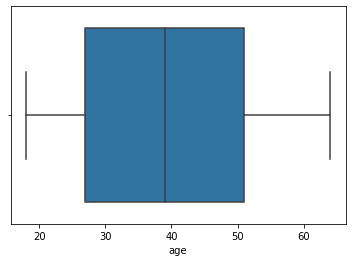

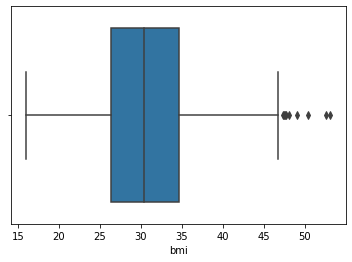

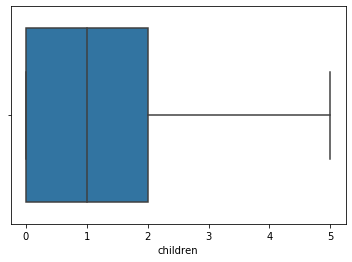

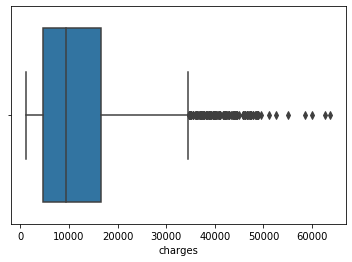

In [51]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.show()

In [52]:
## Since Linear regression model is sensitive to outliers 
## we will go for capping or winsurasation:

for i in num_data.columns:
    q1=num_data[i].quantile(0.25)
    q3=num_data[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+(1.5*iqr)
    lb=q1-(1.5*iqr)
    uc=num_data[i].quantile(0.99)
    lc=num_data[i].quantile(0.01)
    for j in num_data[i].index:
        if num_data.loc[j,i]>ub:
            num_data.loc[j,i]=uc
        if num_data.loc[j,i]<lb:
            num_data.loc[j,i]=lc

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


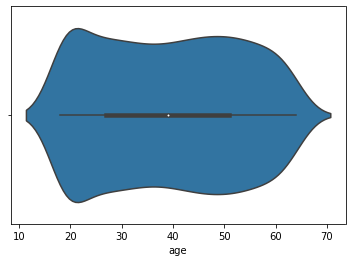

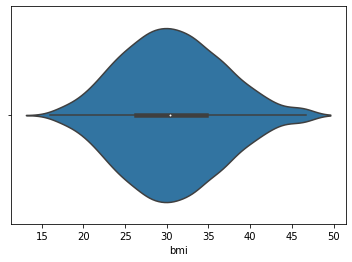

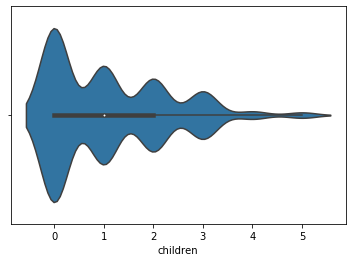

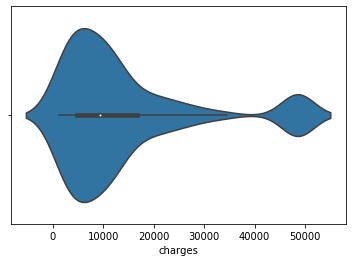

In [53]:
## now check if the outliers are removed using violin plot:

for i in num_data.columns:
    sns.violinplot(num_data[i])
    plt.show()

In [54]:
## the data is alomost free of all outliers:

df1[['age','bmi','children','charges']]=num_data[['age','bmi','children','charges']]

In [55]:
df1.head(3)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0
2,28,33.00,3,4449.4620,1,0,0,1,0


In [56]:
## Once outliers and encoding is done we will be going for going for checking the assumptons:

In [57]:
## Assumption 1:
## We need to check if the ouput column is continous:
## Since insurance charges are in float and is continous in nature we can use linear 
## regression for this model 

In [58]:
## split the data into 2:
inp=df1.drop('charges',axis=1)
out=df1['charges']

In [59]:
## Assumption 2:
## we need to check if there is multi-collinearity problems:

## build the model first:

import statsmodels.api as smi
inpc=smi.add_constant(inp)
ols=smi.OLS(out,inpc)
ols_mod=ols.fit()

ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     450.4
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:40:58   Log-Likelihood:                -13759.
No. Observations:                1338   AIC:                         2.754e+04
Df Residuals:                    1329   BIC:                         2.758e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.351e+04   1162.489    -11.623      0.000   -1.58e+04   -1.12e+04
age                237.9626     13.937     17.075      0.000     210.622     265.303
bmi                412.6934     33.797     12.211      0.000     346.392     478.995
children           493.4398    161.351      3.058      0.002     176.910     809.970
sex_male           101.8427    389.799      0.261      0.794    -662.846     866.532
smoker_yes        2.691e+04    483.747     55.630      0.000     2.6e+04    2.79e+04
region_northwest  -573.1128    557.649     -1.028      0.304   -1667.082     520.856
region_southeast -1117.2663    560.323     -1.994      0.046   -2216.480     -18.052
region_southwest  -764.4759    559.628     -1.366      0.172   -1862.327     333.375
==============================================================================
Omnibus:                      187.161   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.433
Skew:                           0.857   Prob(JB):                     1.47e-78
Kurtosis:                       4.868   Cond. No.                         313.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
## to check for multi-collinearity problems:
## since vif values are sensitive to scaling :

inp1=inp-inp.mean()

In [61]:
## create a data frame to check the vif values of the numerical column:

vif=pd.DataFrame()

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif['Feature_Names']=inp1.columns
vif['Vif_values']=[variance_inflation_factor(inp1.values,i) for i in range(inp1.shape[1])]

vif

,Feature_Names,Vif_values
0,age,1.017521
1,bmi,1.106255
2,children,1.004039
3,sex_male,1.008739
4,smoker_yes,1.012092
5,region_northwest,1.518824
6,region_southeast,1.651313
7,region_southwest,1.529623


In [62]:
## we see that the data is free of multi-collinearity

In [63]:
## Assumption 5: to check for normality:

## level 1 check 

ols_mod.resid.skew()

## The data is not normal 

0.8583833485601692

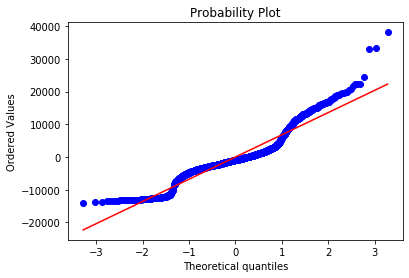

In [64]:
## level 2 check :

import scipy.stats as stats

stats.probplot(ols_mod.resid,plot=plt)
plt.show()

## we see that there is a large deviation of the residue data points from the line 
## so the data is not normal 

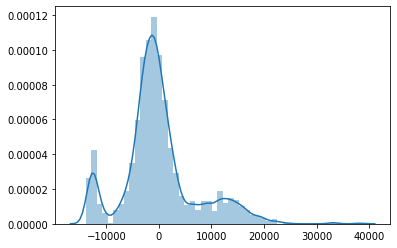

In [65]:
## level 3 check:

sns.distplot(ols_mod.resid)
plt.show()

## we see that the data is skewed towards one side.

In [66]:
## To remove skewness we need to try transform the acctaul output

## log transformation

np.log(out).skew()

0.003587002332258624

In [67]:
## sqrt transformation:

np.sqrt(out).skew()

0.9368317706677455

In [68]:
## using boxcox transformation:

import scipy.stats as stats

val,lam=stats.boxcox(out)

from scipy.stats import skew

skew(val)

0.000304641465187296

In [69]:
out=val

In [70]:
## Assumption 3: Linearity:

## Level 1 check:

from statsmodels.stats.diagnostic import linear_rainbow

linear_rainbow(res=ols_mod,frac=0.6)

## we see that the value is greater that 0.05 , hence it is linear 

(1.0897507447977246, 0.13688553307345247)

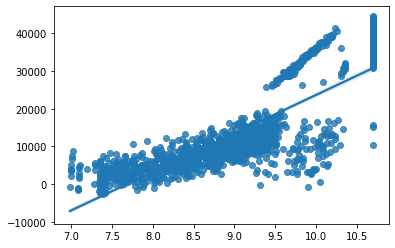

In [71]:
## Level 2 check:

sns.regplot(out,ols_mod.predict(inpc))

## we see that a linear line can be drawn between input and output 

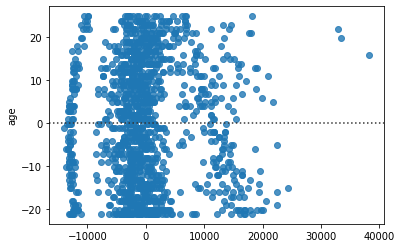

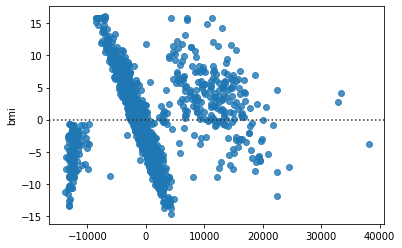

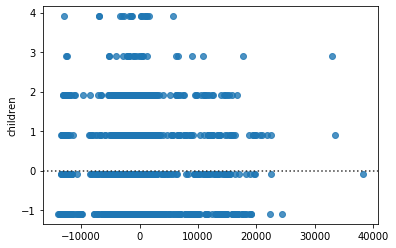

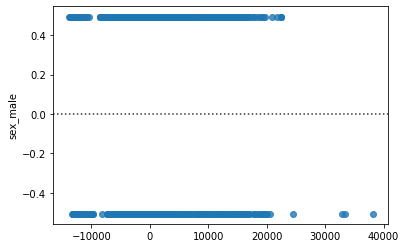

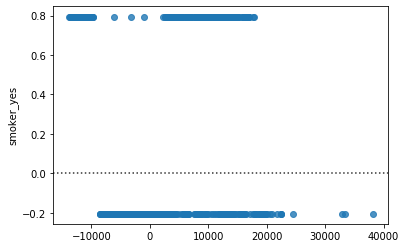

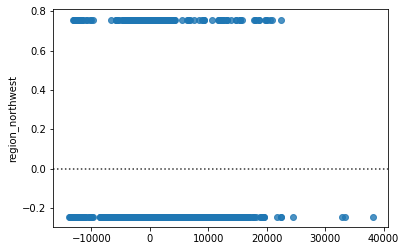

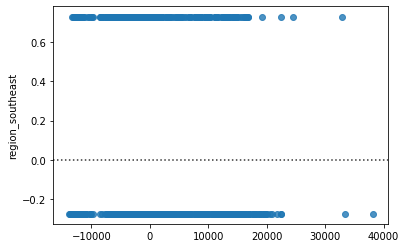

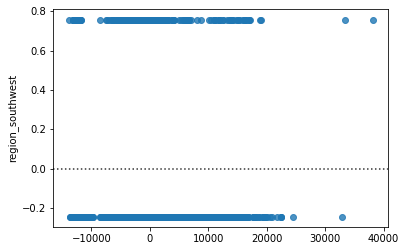

In [72]:
for i in inp1.columns:
    sns.residplot(ols_mod.resid,inp1[i])
    plt.show()
## we see that the residue is symmetrical in nature since the data points equally lie 
## on both sides 

In [73]:
## Assumption 4:Homoscadastic:

from statsmodels.stats.api import het_goldfeldquandt

het_goldfeldquandt(ols_mod.resid,inp1)

## we see that the value is greater than 0.05 hence we accept h0 and it is homoscahdastic 

(0.9775629357171094, 0.6147034159580762, 'increasing')

In [74]:
## ASSUMPTION 6:
## The durbin waston value is around 2 from which we 
## can conclude that there is no auto-correlation

In [75]:

import statsmodels.api as smi

inpc=smi.add_constant(inp1)
ols=smi.OLS(out,inpc)
ols_mod=ols.fit()

ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     534.1
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:41:05   Log-Likelihood:                -840.70
No. Observations:                1338   AIC:                             1699.
Df Residuals:                    1329   BIC:                             1746.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.0458      0.012    727.055      0.000       9.021       9.070
age                  0.0336      0.001     37.645      0.000       0.032       0.035
bmi                  0.0150      0.002      6.915      0.000       0.011       0.019
children             0.1007      0.010      9.734      0.000       0.080       0.121
sex_male            -0.0691      0.025     -2.765      0.006      -0.118      -0.020
smoker_yes           1.6009      0.031     51.613      0.000       1.540       1.662
region_northwest    -0.0679      0.036     -1.899      0.058      -0.138       0.002
region_southeast    -0.1571      0.036     -4.373      0.000      -0.228      -0.087
region_southwest    -0.1227      0.036     -3.419      0.001      -0.193      -0.052
==============================================================================
Omnibus:                      413.891   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1278.273
Skew:                           1.548   Prob(JB):                    2.67e-278
Kurtosis:                       6.653   Cond. No.                         57.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
## ASSUMPTIONS THAT ARE SATISFIED:

## 1. Multi-collinearity
## 2.Linearity
## 3. Homoscadasticity
## 4. Autocorrelation

## We see that there normlality is  not satisfies but since generally arent very strict
## with normality assumptionwe can go ahead .

In [77]:
## Now once the assumptions are satisfied 

                                FEATURE SELECTION

In [78]:
## we can go in for feature selection:

In [79]:
## We will split the data into train and test dataset:

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(inp1,out,train_size=0.7,random_state=10)

In [80]:
## import linear regression and train it with the train data:

from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
## Give the same data and test it 
ypred_train=lr.predict(xtrain)

## Get the r2 and rmse perfomance:
from sklearn.metrics import r2_score,mean_squared_error

r2_train=r2_score(ypred_train,ytrain)
rmse_train=mean_squared_error(ypred_train,ytrain)



In [82]:
## Give different data and test it:
ypred_test=lr.predict(xtest)

from sklearn.metrics import r2_score,mean_squared_error

r2_test=r2_score(ypred_test,ytest)

rmse_test=np.sqrt(mean_squared_error(ypred_test,ytest))


res_lr=[r2_train,r2_test,rmse_train,rmse_test]


In [83]:
## In order to do feature selection we will be going for three methods:

## 1. Backward elimination 
## 2. Forward selection 
## 3. Recursve feature elimination 

In [85]:
## BackWard elimination :

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

lr=LinearRegression()
lr_backward=sfs(estimator=lr,forward=False,k_features='best',scoring='r2')
sfs_backward=lr_backward.fit(inp1,out)
back_feat=list(sfs_backward.k_feature_names_)

## As per backward selection all columns play a significant role in computation of medical insurance ch

['age',
 'bmi',
 'children',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [551]:
## Forward selection:

from mlxtend.feature_selection import SequentialFeatureSelector as sfs 

lr=LinearRegression()
lr_forward=sfs(estimator=lr,forward=True,k_features='best',scoring='r2')
sfs_forward=lr_backward.fit(inp1,out)

for_feat=list(sfs_forward.k_feature_names_)

## we see that all feature play a significant role in contributing to the insurance charges


In [552]:
## Recursive feature elimination:

from sklearn.feature_selection import RFECV

lr=LinearRegression()
rfe=RFECV(estimator=lr)
rfe_mod=rfe.fit(inp1,out)
rfe_mod.ranking_

## Thus all features are important 
rfe_feat=list(inp1.columns)

In [553]:
## r2 and rmse for backward

from sklearn.metrics import r2_score,mean_squared_error
lr=LinearRegression()
lr.fit(xtrain[back_feat],ytrain)

ypred_train=lr.predict(xtrain[back_feat])
ypred_test=lr.predict(xtest[back_feat])

r2_train=r2_score(ypred_train,ytrain)
r2_test=r2_score(ypred_test,ytest)

rmse_train=np.sqrt(mean_squared_error(ypred_train,ytrain))
rmse_test=np.sqrt(mean_squared_error(ypred_test,ytest))

res_back=[r2_train,r2_test,rmse_train,rmse_test]

In [554]:
## r2 and rmse for forward :

from sklearn.metrics import r2_score,mean_squared_error

lr=LinearRegression()
lr.fit(xtrain[for_feat],ytrain)

ypred_train=lr.predict(xtrain[for_feat])
ypred_test=lr.predict(xtest[for_feat])

r2_test=r2_score(ypred_train,ytrain)
r2_train=r2_score(ypred_test,ytest)


rmse_train=np.sqrt(mean_squared_error(ypred_train,ytrain))
rmse_test=np.sqrt(mean_squared_error(ypred_test,ytest))

res_for=[r2_test,r2_train,rmse_train,rmse_test]



In [555]:
## r2 and rmse for rfe:

from sklearn.metrics import r2_score,mean_squared_error

lr=LinearRegression()
lr.fit(xtrain[rfe_feat],ytrain)

ypred_train=lr.predict(xtrain[rfe_feat])
ypred_test=lr.predict(xtest[rfe_feat])

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))
                   
res_rfe=[r2_train,r2_test,rmse_train,rmse_test]
                   
                   



In [556]:
## To create a score card to compare the train and test perfomace:
score_card=pd.DataFrame()

score_card['Linear_regression']=res_lr
score_card['Backward_Elimination']=res_rfe
score_card['Forward_Selection']=res_for
score_card['Recursive_Feature_Elimination']=res_rfe

score_card.index=['r2_train','r2_test','rmse_train','rmse_test']

score_card

,Linear_regression,Backward_Elimination,Forward_Selection,Recursive_Feature_Elimination
r2_train,0.705743,0.772644,0.705743,0.772644
r2_test,0.670012,0.735880,0.670012,0.735880
rmse_train,0.203263,0.450847,0.450847,0.450847
rmse_test,0.461012,0.461012,0.461012,0.461012


                      CHECKING FOR BIAS AND VARIANCE ERROR

In [557]:
## We see that backward Elimination and Rfe is giving least difference between train and test 
## To make sure that train and test is a representative of the overall data.
## We need to ensure we do a Cross Validation

from sklearn.model_selection import cross_val_score

lr=LinearRegression()
score=cross_val_score(lr,inp1[back_feat],out,cv=5,scoring='r2')
avg_score=np.mean(score)
ve=np.std(score)
cve=(np.std(score))/(np.mean(score))

avg_score,ve,cve


(0.7587453285736929, 0.04790028963923784, 0.06313091868292872)

In [558]:
## to do a cross validation rfe:

from sklearn.model_selection import cross_val_score

lr=LinearRegression()
score=cross_val_score(lr,inp1[rfe_feat],out,cv=5,scoring='r2')
avg_score=np.mean(score)
ve=np.std(score)
cve=(np.std(score))/(np.mean(score))

avg_score,ve,cve

(0.7587453285736929, 0.04790028963923784, 0.06313091868292872)

                                  REGULARISATION

In [559]:
## 1. We see that the model perfomance is good , so less bias error
## 2. The variance error is less than 10% 
## 3. In order to make sure that this data works well for any test data , it is better to do 
## some amount of  regularisation 

In [560]:
## Import necessary libraries for Regularisation:


from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [561]:
## For ridge model 
rid=Ridge(normalize=True)
param={'alpha':[0.00001,0.0001,0.001,0.01,0.1,0.2,0.5,0.8,1,2,5,10,20,30,50,100]}
rid_mod=GridSearchCV(rid,param_grid=param,scoring='r2')
rid_mod.fit(xtrain,ytrain)

print('The best alpha value is:',rid_mod.best_params_)

## Let us see the overall value for all alphas

rid_results=pd.DataFrame(rid_mod.cv_results_)
rid_results.sort_values('std_test_score')

The best alpha value is: {'alpha': 0.001}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.006600,0.002059,0.002395,0.000801,20,{'alpha': 20},0.066627,0.060826,0.065210,0.065315,0.065743,0.064744,0.002022,13
13,0.003998,0.000632,0.001798,0.000747,30,{'alpha': 30},0.045437,0.036901,0.041726,0.042142,0.041288,0.041499,0.002726,14
11,0.004198,0.000748,0.002198,0.000399,10,{'alpha': 10},0.124393,0.125851,0.129127,0.128238,0.132318,0.127985,0.002742,12
14,0.003199,0.000978,0.001398,0.000491,50,{'alpha': 50},0.027708,0.016856,0.022064,0.022720,0.020816,0.022033,0.003492,15
15,0.002399,0.000799,0.001400,0.000489,100,{'alpha': 100},0.013932,0.001266,0.006775,0.007607,0.004902,0.006896,0.004140,16
10,0.005198,0.000400,0.002398,0.000489,5,{'alpha': 5},0.218778,0.231329,0.233263,0.230134,0.240727,0.230846,0.007069,11
9,0.004198,0.000749,0.002199,0.000399,2,{'alpha': 2},0.398016,0.427675,0.430166,0.419314,0.444530,0.423940,0.015298,10
8,0.004398,0.000800,0.002398,0.000799,1,{'alpha': 1},0.540178,0.576731,0.586008,0.562775,0.602282,0.573595,0.021074,9
7,0.002799,0.000748,0.001800,0.000400,0.8,{'alpha': 0.8},0.579546,0.616084,0.629273,0.600744,0.644732,0.614076,0.022560,8
6,0.003198,0.000979,0.001799,0.000401,0.5,{'alpha': 0.5},0.646318,0.679317,0.703110,0.662091,0.714276,0.681022,0.025137,7


In [562]:
## From ridge we can go with:
## {'alpha': 0.001}	,mean_r2_vale:0.767778,mean_std_vale:	0.035805	

In [563]:
## From Lasso we can go with :
las=Lasso(normalize=True)
param={'alpha':[0.00001,0.0001,0.001,0.01,0.1,0.2,0.5,0.8,1,2,5,10,20,30,50,100]}
las_mod=GridSearchCV(las,param_grid=param,scoring='r2')
las_mod.fit(xtrain,ytrain)

print('The best alpha value is',las_mod.best_params_)

las_results=pd.DataFrame(las_mod.cv_results_)
las_results.sort_values('std_test_score')

The best alpha value is {'alpha': 1e-05}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.003399,0.000490,0.001800,1.165030e-03,0.1,{'alpha': 0.1},-0.000274,-0.014827,-0.009001,-0.007996,-0.011516,-0.008723,0.004838,5
5,0.003201,0.001166,0.001996,6.782160e-06,0.2,{'alpha': 0.2},-0.000274,-0.014827,-0.009001,-0.007996,-0.011516,-0.008723,0.004838,5
6,0.002199,0.000400,0.001200,3.988269e-04,0.5,{'alpha': 0.5},-0.000274,-0.014827,-0.009001,-0.007996,-0.011516,-0.008723,0.004838,5
7,0.002998,0.000632,0.000999,1.451027e-06,0.8,{'alpha': 0.8},-0.000274,-0.014827,-0.009001,-0.007996,-0.011516,-0.008723,0.004838,5
8,0.003198,0.000400,0.000999,3.147125e-06,1,{'alpha': 1},-0.000274,-0.014827,-0.009001,-0.007996,-0.011516,-0.008723,0.004838,5
9,0.002599,0.000490,0.001398,4.885025e-04,2,{'alpha': 2},-0.000274,-0.014827,-0.009001,-0.007996,-0.011516,-0.008723,0.004838,5
10,0.002998,0.000631,0.000998,2.960233e-06,5,{'alpha': 5},-0.000274,-0.014827,-0.009001,-0.007996,-0.011516,-0.008723,0.004838,5
11,0.003398,0.000800,0.001599,4.889297e-04,10,{'alpha': 10},-0.000274,-0.014827,-0.009001,-0.007996,-0.011516,-0.008723,0.004838,5
12,0.002799,0.000748,0.001400,4.907630e-04,20,{'alpha': 20},-0.000274,-0.014827,-0.009001,-0.007996,-0.011516,-0.008723,0.004838,5
13,0.002199,0.000401,0.000999,8.203817e-07,30,{'alpha': 30},-0.000274,-0.014827,-0.009001,-0.007996,-0.011516,-0.008723,0.004838,5


In [564]:
## By comparing manually for least bias and variance error:
## The best value for lasso:

## {'alpha': 0.001}, r2_mean:0.762845	std_value: 	0.032807

In [565]:
## For Elastic net :
param={'alpha':[0.00001,0.0001,0.001,0.01,0.1,0.2,0.5,0.8,1,2,5,10,20,30,50,100],
      'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

enet=ElasticNet(normalize=True)
enet_mod=GridSearchCV(enet,param_grid=param,scoring='r2',cv=5)

enet_mod.fit(xtrain,ytrain)

print('The best r2 value',enet_mod.best_score_)

enet_results=pd.DataFrame(enet_mod.cv_results_)
enet_results.sort_values('std_test_score')

The best r2 value 0.7677861601723903


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
36,0.003398,7.991563e-04,0.001399,4.893762e-04,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",0.009960,-0.003018,0.002719,0.003448,0.000282,0.002678,0.004285,37
27,0.001999,2.861023e-07,0.000999,1.144409e-06,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",0.164063,0.170676,0.172752,0.170147,0.177762,0.171080,0.004421,36
37,0.002399,7.990842e-04,0.001000,7.893059e-07,0.1,0.2,"{'alpha': 0.1, 'l1_ratio': 0.2}",0.001735,-0.012730,-0.006649,-0.005666,-0.009216,-0.006505,0.004790,38
45,0.001799,3.999241e-04,0.000999,6.468134e-07,0.2,0.1,"{'alpha': 0.2, 'l1_ratio': 0.1}",0.000627,-0.013886,-0.007945,-0.006950,-0.010484,-0.007728,0.004816,39
28,0.001998,8.583069e-07,0.001000,1.482036e-06,0.01,0.2,"{'alpha': 0.01, 'l1_ratio': 0.2}",0.170004,0.177743,0.179461,0.177199,0.185066,0.177895,0.004830,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.002402,4.937982e-04,0.001197,4.014304e-04,1e-05,0.5,"{'alpha': 1e-05, 'l1_ratio': 0.5}",0.748082,0.743727,0.824110,0.728853,0.794157,0.767786,0.035639,2
5,0.002399,4.897273e-04,0.001199,4.014504e-04,1e-05,0.6,"{'alpha': 1e-05, 'l1_ratio': 0.6}",0.748135,0.743664,0.824202,0.728805,0.794125,0.767786,0.035676,1
6,0.002999,1.095932e-03,0.000999,1.221299e-06,1e-05,0.7,"{'alpha': 1e-05, 'l1_ratio': 0.7}",0.748187,0.743600,0.824293,0.728756,0.794092,0.767786,0.035714,3
7,0.002398,4.894163e-04,0.001800,7.474239e-04,1e-05,0.8,"{'alpha': 1e-05, 'l1_ratio': 0.8}",0.748239,0.743535,0.824384,0.728706,0.794058,0.767785,0.035752,5


In [566]:
## The best value out for elastic net is:
## {'alpha': 1e-05, 'l1_ratio': 0.6}, mean_r2_vale: 0.767786	 mean_r2_vale:0.035676	


In [567]:
## Now out of all the three values the best model which could be used for

## RIDGE: {'alpha': 0.001}	,mean_r2_vale:0.730921,mean_r2_vale:0.016644	

## LASSO:{'alpha': 20}, r2_mean:0.726895	std_value: 0.015214	

## ELASTIC NET:{'alpha': 1e-05, 'l1_ratio': 0.6}, mean_r2_vale: 0.767786	 mean_r2_vale:0.035676	

In [568]:
## For prediction we can go with Ridge or lasso since both give good r2 and less variance

                                FINAL MODEL

In [569]:
## For a final model: we can use features from backward selection:

import statsmodels.api as smi

inpc=smi.add_constant(inp1[back_feat])

ols=smi.OLS(out,inpc)

ols_mod=ols.fit()

ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     534.1
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:32:22   Log-Likelihood:                -840.70
No. Observations:                1338   AIC:                             1699.
Df Residuals:                    1329   BIC:                             1746.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.0458      0.012    727.055      0.000       9.021       9.070
age                  0.0336      0.001     37.645      0.000       0.032       0.035
bmi                  0.0150      0.002      6.915      0.000       0.011       0.019
children             0.1007      0.010      9.734      0.000       0.080       0.121
sex_male            -0.0691      0.025     -2.765      0.006      -0.118      -0.020
smoker_yes           1.6009      0.031     51.613      0.000       1.540       1.662
region_northwest    -0.0679      0.036     -1.899      0.058      -0.138       0.002
region_southeast    -0.1571      0.036     -4.373      0.000      -0.228      -0.087
region_southwest    -0.1227      0.036     -3.419      0.001      -0.193      -0.052
==============================================================================
Omnibus:                      413.891   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1278.273
Skew:                           1.548   Prob(JB):                    2.67e-278
Kurtosis:                       6.653   Cond. No.                         57.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                                      INFERENCE

In [87]:
## Through the model:

## 1. For every one unit increase in age the coverage amount increases by 0.03 units
## 2. For every one unit increase the number of children the coverage amount increses by 0.01 units
## 3. The coverage amount for males is 0.06 units lesser than females 
## 4. The coverage amount of smoker males is 1.6 units greater than non smokers 
## 5. For every one unit increase in bmi the coverage amount increases by 0.01

## The overall model works well and all the features are significant 

## Their target customers can be more from the south east region 
## Smokers can be of high risk but the coverage amount is larger 
